In [1]:
from google.colab import files
from IPython.display import Image

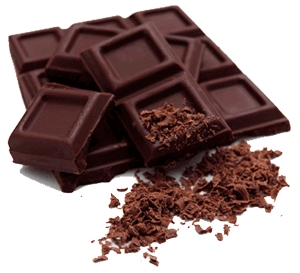

In [3]:
Image('/chocolate-png-32797.png',width=750)

Import Important Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [6]:
df=pd.read_csv('/Chocolate Sales (2).csv')

In [7]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


Check the last rows of the datasets

In [8]:
df.tail()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
3277,Karlen McCaffrey,Australia,Spicy Special Slims,17/05/2024,"$5,303.58",354
3278,Jehu Rudeforth,USA,White Choc,07/06/2024,"$7,339.32",121
3279,Ches Bonnell,Canada,Organic Choco Syrup,26/07/2024,$616.09,238
3280,Dotty Strutley,India,Eclairs,28/07/2024,"$2,504.62",397
3281,Karlen McCaffrey,India,70% Dark Bites,23/05/2024,"$5,915.87",355


Basic info

In [9]:
df.shape

(3282, 6)

In [10]:
df.columns

Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount',
       'Boxes Shipped'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   3282 non-null   object
 1   Country        3282 non-null   object
 2   Product        3282 non-null   object
 3   Date           3282 non-null   object
 4   Amount         3282 non-null   object
 5   Boxes Shipped  3282 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 154.0+ KB


In [12]:
df.describe()

,Boxes Shipped
count,3282.000000
mean,164.666971
std,124.024736
min,1.000000
25%,71.000000
50%,137.000000
75%,232.000000
max,778.000000


Data Cleaning

In [13]:
df['Amount'] = df['Amount'].str.replace('$','', regex=False)
df['Amount'] = df['Amount'].str.replace(',','', regex=False)
df['Amount'] = df['Amount'].astype(float)

In [14]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


In [15]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [16]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Year,Month,Day
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180,2022,1,4
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94,2022,8,1
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91,2022,7,7
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,2022,4,27
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,2022,2,24


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   3282 non-null   object        
 1   Country        3282 non-null   object        
 2   Product        3282 non-null   object        
 3   Date           3282 non-null   datetime64[ns]
 4   Amount         3282 non-null   float64       
 5   Boxes Shipped  3282 non-null   int64         
 6   Year           3282 non-null   int32         
 7   Month          3282 non-null   int32         
 8   Day            3282 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(1), object(3)
memory usage: 192.4+ KB


Missing values and Dupliactes

In [18]:
print("Missing values:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

Missing values:
 Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
Year             0
Month            0
Day              0
dtype: int64
Duplicate rows: 0


Exploatary Data Analysis

In [19]:
df[['Amount','Boxes Shipped']].describe()

,Amount,Boxes Shipped
count,3282.000000,3282.000000
mean,6030.338775,164.666971
std,4393.980200,124.024736
min,7.000000,1.000000
25%,2521.495000,71.000000
50%,5225.500000,137.000000
75%,8556.842500,232.000000
max,26170.950000,778.000000


In [20]:
print("Top Countries:\n", df['Country'].value_counts().head())
print("Top Products:\n", df['Product'].value_counts().head())
print("Top Sales Persons:\n", df['Sales Person'].value_counts().head())

Top Countries:
 Country
Australia    615
India        552
USA          537
UK           534
Canada       525
Name: count, dtype: int64
Top Products:
 Product
Eclairs               180
50% Dark Bites        180
Smooth Sliky Salty    177
White Choc            174
Drinking Coco         168
Name: count, dtype: int64
Top Sales Persons:
 Sales Person
Kelci Walkden     162
Brien Boise       159
Van Tuxwell       153
Beverie Moffet    150
Oby Sorrel        147
Name: count, dtype: int64


## Sales Distribution

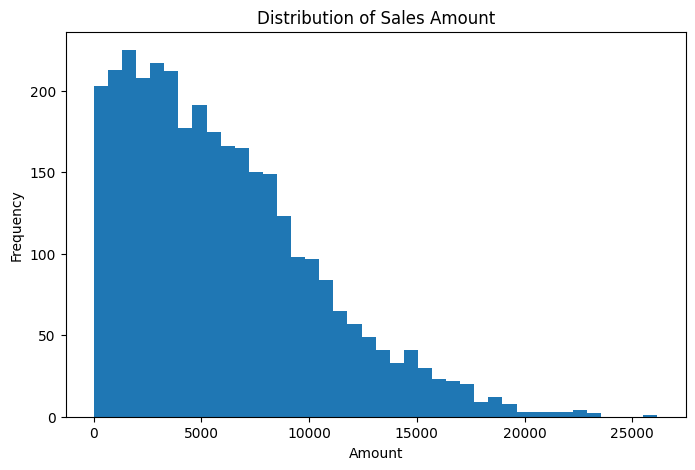

In [21]:
plt.figure(figsize=(8,5))
plt.hist(df['Amount'], bins=40)
plt.title("Distribution of Sales Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

## Box shipped distribution

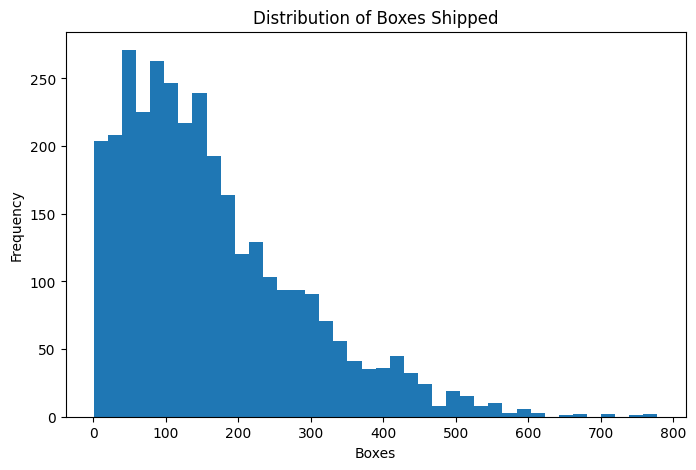

In [22]:
plt.figure(figsize=(8,5))
plt.hist(df['Boxes Shipped'], bins=40)
plt.title("Distribution of Boxes Shipped")
plt.xlabel("Boxes")
plt.ylabel("Frequency")
plt.show()


## Sales by country

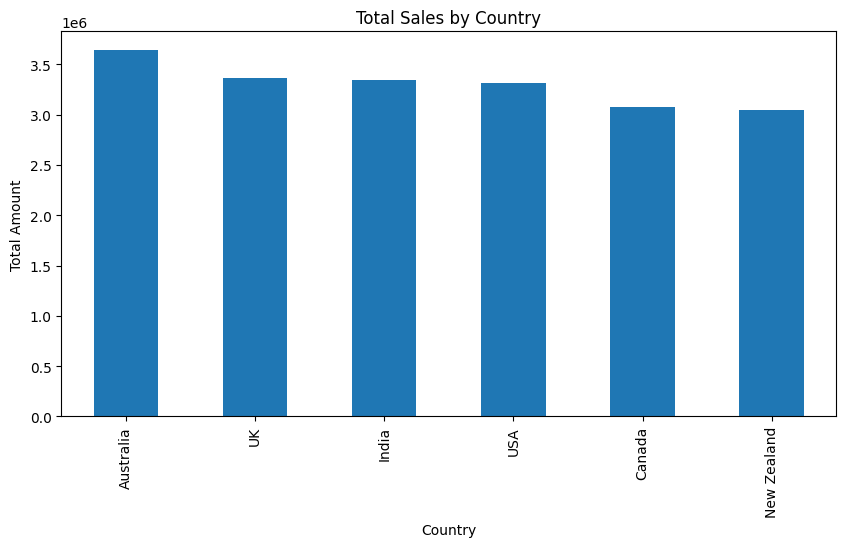

In [23]:
country_sales = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)


plt.figure(figsize=(10,5))
country_sales.plot(kind='bar')
plt.title("Total Sales by Country")
plt.ylabel("Total Amount")
plt.show()

## Sales by product

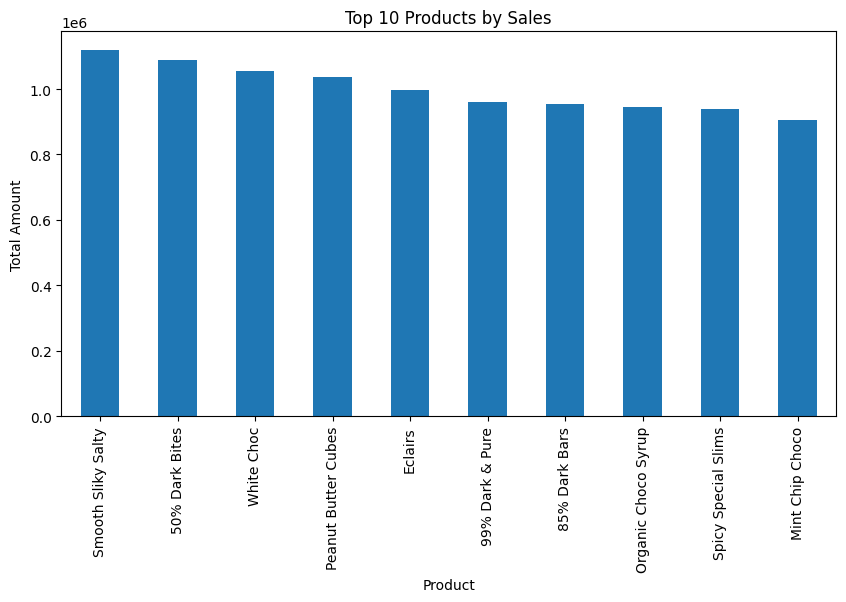

In [24]:
product_sales = df.groupby('Product')['Amount'].sum().sort_values(ascending=False).head(10)


plt.figure(figsize=(10,5))
product_sales.plot(kind='bar')
plt.title("Top 10 Products by Sales")
plt.ylabel("Total Amount")
plt.show()

## Monthly Sales Trend

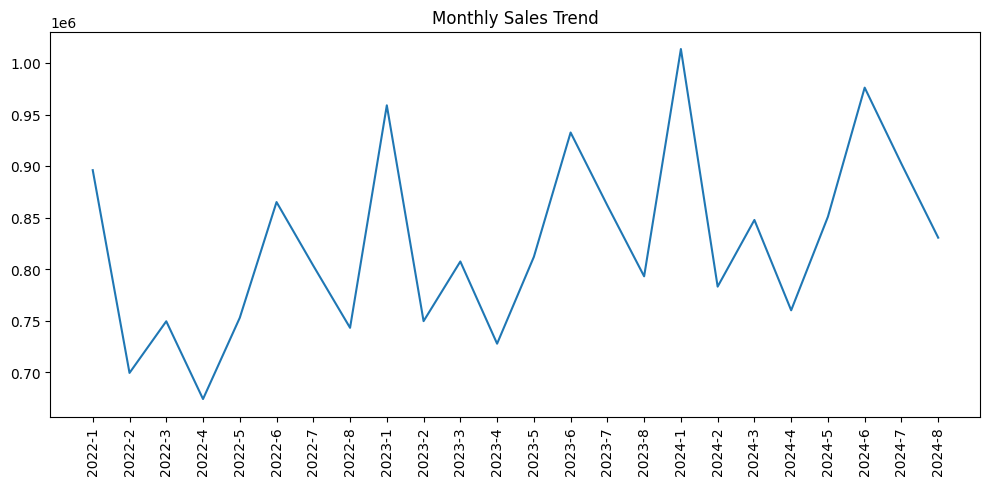

In [25]:
monthly_sales = df.groupby(['Year','Month'])['Amount'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str)


plt.figure(figsize=(12,5))
plt.plot(monthly_sales['YearMonth'], monthly_sales['Amount'])
plt.xticks(rotation=90)
plt.title("Monthly Sales Trend")
plt.show()

## Correlation Matrix

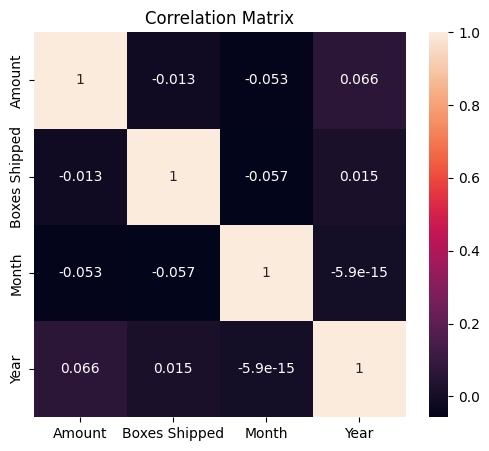

In [26]:
corr = df[['Amount','Boxes Shipped','Month','Year']].corr()


plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")
plt.show()

## Busniness KPI

In [27]:
total_sales = df['Amount'].sum()
avg_order = df['Amount'].mean()
total_boxes = df['Boxes Shipped'].sum()


print("Total Sales:", total_sales)
print("Average Order Value:", avg_order)
print("Total Boxes Shipped:", total_boxes)

Total Sales: 19791571.860000003
Average Order Value: 6030.338775137113
Total Boxes Shipped: 540437


## Model Prediction

In [28]:
ml_df = df.copy()


le = LabelEncoder()
for col in ['Sales Person','Country','Product']:
    ml_df[col] = le.fit_transform(ml_df[col])


X = ml_df[['Sales Person','Country','Product','Boxes Shipped','Month','Year']]
y = ml_df['Amount']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the ML model

In [30]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

## Model Evaluation

In [31]:
y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("MAE:", mae)
print("R2 Score:", r2)

MAE: 1973.054733637748
R2 Score: 0.6115724795909461


## features Importance

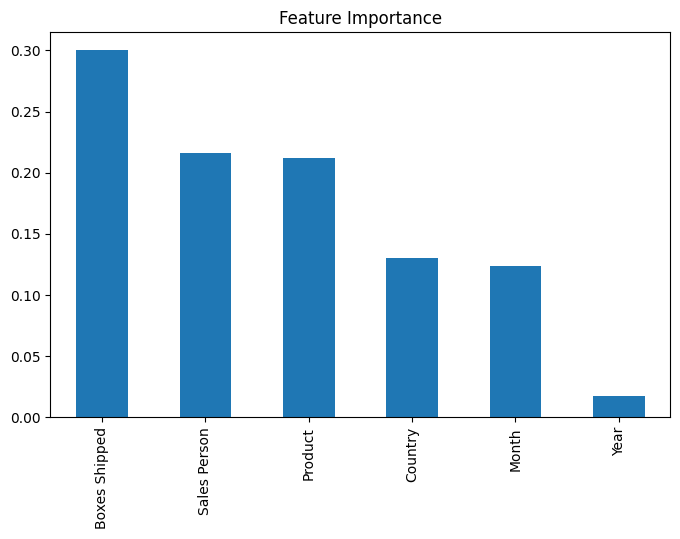

In [32]:
importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)


plt.figure(figsize=(8,5))
importance.plot(kind='bar')
plt.title("Feature Importance")
plt.show()


## Sales Person performance

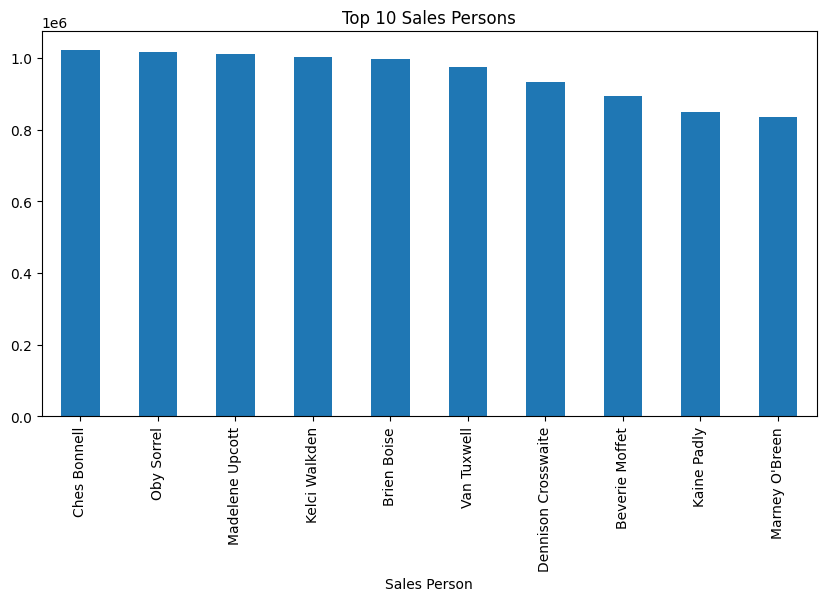

In [33]:
sales_person_perf = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False).head(10)


plt.figure(figsize=(10,5))
sales_person_perf.plot(kind='bar')
plt.title("Top 10 Sales Persons")
plt.show()

## Country vs boxes

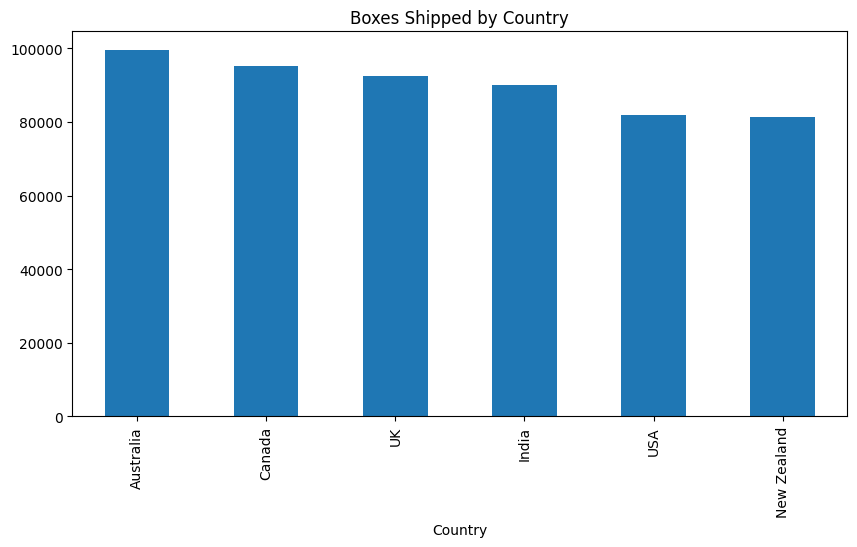

In [34]:
country_boxes = df.groupby('Country')['Boxes Shipped'].sum().sort_values(ascending=False)


plt.figure(figsize=(10,5))
country_boxes.plot(kind='bar')
plt.title("Boxes Shipped by Country")
plt.show()

## Product Profiltablity

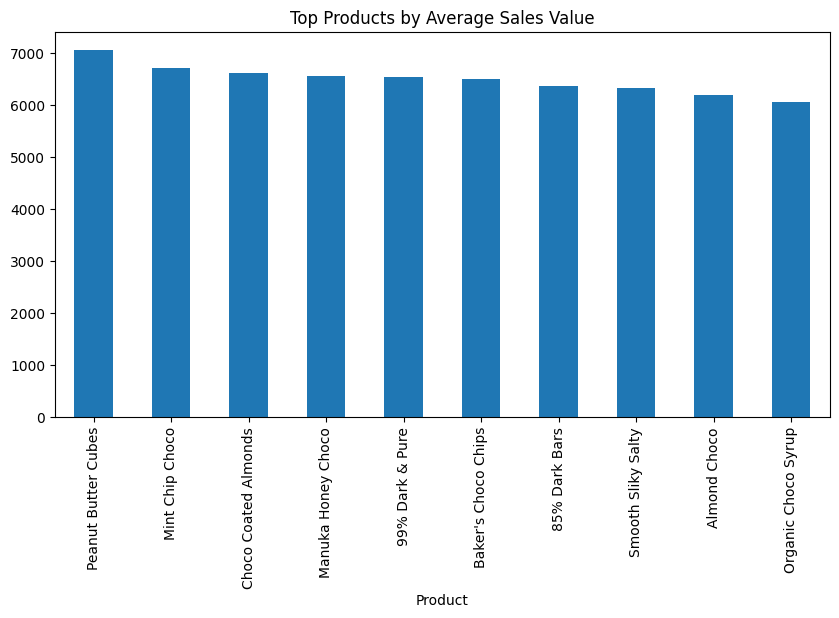

In [35]:
product_avg = df.groupby('Product')['Amount'].mean().sort_values(ascending=False).head(10)


plt.figure(figsize=(10,5))
product_avg.plot(kind='bar')
plt.title("Top Products by Average Sales Value")
plt.show()


## XGBOOST REGRESSOR

In [36]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

## Evaluate XGBoost

In [37]:
xgb_pred = xgb_model.predict(X_test)


xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)


print("XGBoost MAE:", xgb_mae)
print("XGBoost R2:", xgb_r2)

XGBoost MAE: 2242.419253951585
XGBoost R2: 0.4935795064591748


## Time series Analysis

In [42]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [43]:
ts_df = df.groupby('Date')['Amount'].sum().reset_index()
ts_df = ts_df.sort_values('Date')

ts_df.head()

,Date,Amount
0,2022-01-03,40425.0
1,2022-01-04,77175.0
2,2022-01-05,29162.0
3,2022-01-07,8666.0
4,2022-01-10,51471.0


## ARIMA MODEL FORECASTING

In [44]:
ts_df = df.groupby('Date')['Amount'].sum().reset_index()
ts_df['Date'] = pd.to_datetime(ts_df['Date'])

# Set index
ts_df = ts_df.set_index('Date').asfreq('D')

# Fill missing days with 0 sales (or use forward fill)
ts_df['Amount'] = ts_df['Amount'].fillna(0)

ts_series = ts_df['Amount']

ts_series.head()

,Amount
Date,
2022-01-03,40425.0
2022-01-04,77175.0
2022-01-05,29162.0
2022-01-06,0.0
2022-01-07,8666.0


In [45]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(ts_series, order=(3,1,2))
arima_result = arima_model.fit()

arima_forecast = arima_result.forecast(steps=60)

arima_forecast.head()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


,predicted_mean
2024-09-01,22137.118487
2024-09-02,26495.047500
2024-09-03,24685.460447
2024-09-04,21904.476138
2024-09-05,20454.677702


## Plot ARIMA Forecast

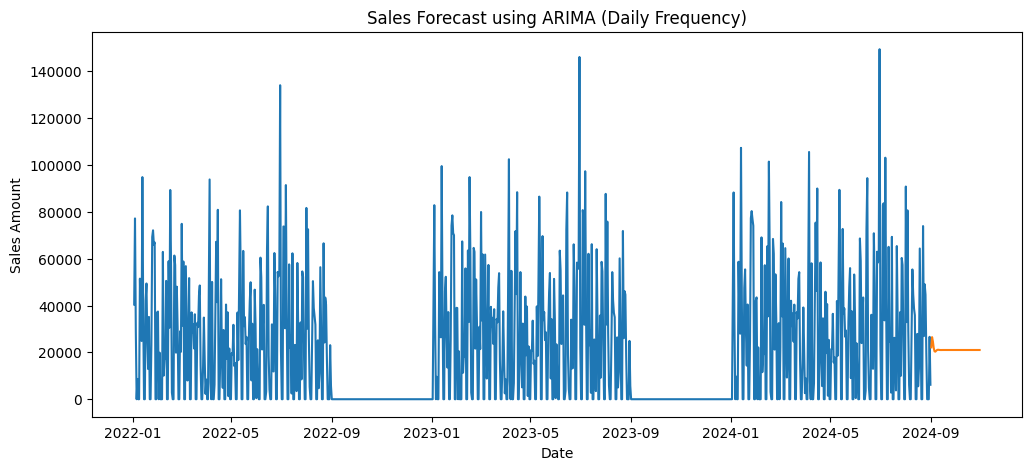

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

plt.plot(ts_series, label="Historical Sales")
plt.plot(arima_forecast.index, arima_forecast, label="ARIMA Forecast")

plt.title("Sales Forecast using ARIMA (Daily Frequency)")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.show()

## Prohpet Forecasting model

In [47]:
from prophet import Prophet

# Reset index so Date becomes a column
prophet_df = ts_df.reset_index()

# Rename columns for Prophet
prophet_df = prophet_df.rename(columns={'Date': 'ds', 'Amount': 'y'})

# Ensure correct types
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])
prophet_df['y'] = prophet_df['y'].astype(float)

# Train model
prophet_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)
prophet_model.fit(prophet_df)

# Forecast
future = prophet_model.make_future_dataframe(periods=60)
forecast = prophet_model.predict(future)

forecast[['ds', 'yhat']].tail()

,ds,yhat
1027,2024-10-26,20.544789
1028,2024-10-27,-9016.620300
1029,2024-10-28,-1808.589934
1030,2024-10-29,1341.559492
1031,2024-10-30,3163.177803


## Plot Prophet Model

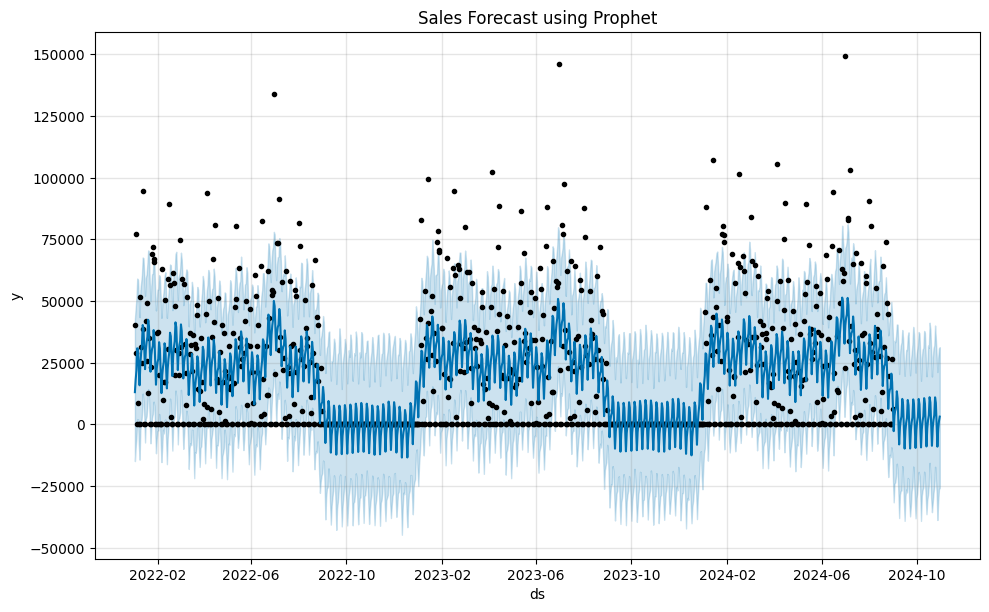

In [48]:
prophet_model.plot(forecast)
plt.title("Sales Forecast using Prophet")
plt.show()